In [6]:
# importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statistics import stdev 
from numpy import mean
from numpy import cov
import seaborn as sns
import sklearn 
from scipy.stats import kurtosis, skew
from sklearn.model_selection import train_test_split

In [7]:
#  Importing Iris Dataset

In [8]:
# from sklearn.preprocessing import Imputer
sns.set()
dataset = pd.read_csv("iris_dataset_missing_new.csv")

dataset.fillna(dataset.mean(), inplace=True)

dataset.head()



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.045070,2.508203,3.018024,1.164924,Iris-versicolor
1,6.325517,2.115481,4.542052,1.413651,Iris-versicolor
2,5.257497,3.814303,1.470660,0.395348,Iris-setosa
3,6.675168,3.201700,5.785461,2.362764,Iris-virginica
4,5.595237,2.678166,4.077750,1.369266,Iris-versicolor


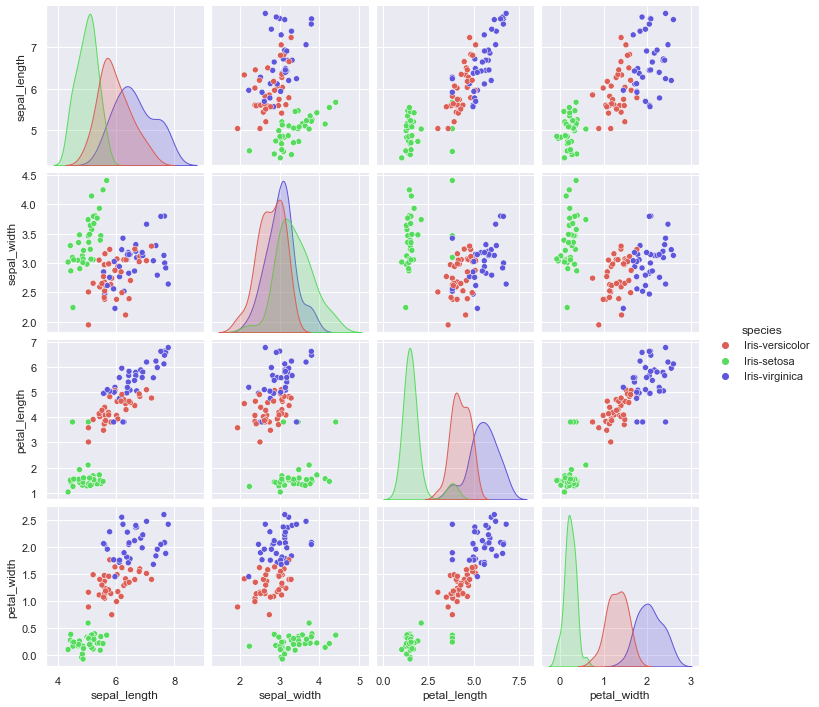

In [9]:
# [CM1] In order to find realtionshipe between features we used seaborn plotting. 
# Outliers can also be easily identified using this plotting methos


# Interesting Patterns : Using pedal_length and pedal_width we can easily identifed species category. 
# Moreover in species iris_setosa have bit different features comparre to other two species 
# ( iris-versicolor and iris-verginica)


# Seaborn Plotting
sns.pairplot(dataset,hue = "species",palette = "hls")

In [10]:
sepal_length = dataset['sepal_length'].iloc[0:105].values
sepal_width = dataset['sepal_width'].iloc[0:105].values
petal_length = dataset['petal_length'].iloc[0:105].values
petal_width = dataset['petal_width'].iloc[0:105].values

In [11]:

dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,105.000000,105.000000,105.000000
mean,5.858909,3.059083,3.812370,1.199708
std,0.861638,0.446278,1.723128,0.787193
min,4.344007,1.946010,1.033031,-0.072203
25%,5.159145,2.771731,1.588587,0.333494
50%,5.736104,3.056142,4.089166,1.331797
75%,6.435413,3.239682,5.062244,1.817211
max,7.795561,4.409565,6.768611,2.603123


In [12]:
###  CM2

In [13]:


sl_mean = mean(sepal_length)
sw_mean = mean(sepal_width)
pl_mean = mean(petal_length)
pw_mean = mean(petal_width)
sepal_length = dataset['sepal_length'].iloc[0:105].fillna(sl_mean).values
sepal_width = dataset['sepal_width'].iloc[0:105].fillna(sw_mean).values
petal_length = dataset['petal_length'].iloc[0:105].fillna(pl_mean).values
petal_width = dataset['petal_width'].iloc[0:105].fillna(pw_mean).values

# [CM2] Variance of each features 
# ( High variance indicates that values are far from mean whereas Low variance indicates that values are near from mean)
sl_var = np.var(sepal_length)
sw_var = np.var(sepal_width)
pl_var = np.var(petal_length)
pw_var = np.var(petal_width)


print('Mean of sepal length :',sl_mean)
print('Mean of sepal width :',sw_mean)
print('Mean of petal length :',pl_mean)
print('Mean of petal width :',pw_mean)
print('Variance of sepal length :',sl_var)
print('Variance of sepal width :',sw_var)
print('Variance of petal length :',pl_var)
print('Variance of petal width :',pw_var)


Mean of sepal length : 5.85890871719058
Mean of sepal width : 3.0590829538769273
Mean of petal length : 3.812369746505283
Mean of petal width : 1.1997083809633513
Variance of sepal length : 0.7353489903763762
Variance of sepal width : 0.19726751060501657
Variance of petal length : 2.9408936576611167
Variance of petal width : 0.6137705671847627


In [14]:
cov_sl_sw =  cov(sepal_length,sepal_width)
cov_sl_pl =  cov(sepal_length,sepal_width)
cov_sl_pw =  cov(sepal_length,sepal_width)
cov_sw_pl =  cov(sepal_length,sepal_width)

In [15]:
cc_sl_sw = cov(sepal_length,sepal_width)/(stdev(sepal_length) * stdev(sepal_width))
cc_sl_pl = cov(sepal_length,petal_length)/(stdev(sepal_length) * stdev(petal_length))
cc_sl_pw = cov(sepal_length,petal_width)/(stdev(sepal_length) * stdev(petal_width))
cc_sw_pl = cov(sepal_width,petal_length)/(stdev(sepal_width) * stdev(petal_length))
cc_sw_pw = cov(sepal_width,petal_width)/(stdev(sepal_width) * stdev(petal_width))
cc_pl_pw = cov(petal_length,petal_width)/(stdev(petal_length) * stdev(petal_width))

In [16]:
# [CM2] Inorder to identify corelation between features, we can use corr features.
# Values of corelation is lied between -1 to 1. More values towards 1 indicates that those features are positively corelated. 
# From correlation matrix we can see that petal_legth and petal_width are more positively corelated.
dataset.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.031567,0.863919,0.809915
sepal_width,-0.031567,1.000000,-0.261689,-0.264253
petal_length,0.863919,-0.261689,1.000000,0.921109
petal_width,0.809915,-0.264253,0.921109,1.000000


In [17]:
# [CM2] Skewness and kurtosis for each feature

print ('skewness of sepal_length (Should be 0) : {}'.format( skew(sepal_length) ) )
print ('kurtosis of sepal_length (Should be 0) : {}'.format( kurtosis(sepal_length) ) )

print ('skewness of sepal_width (Should be 0) : {}'.format( skew(sepal_width) ) )
print ('kurtosis of sepal_width (Should be 0) : {}'.format( kurtosis(sepal_width) ) )

print ('skewness of petal_length (Should be 0) : {}'.format( skew(petal_length) ) )
print ('kurtosis of petal_length (Should be 0) : {}'.format( kurtosis(petal_length) ) )

print ('skewness of petal_width (Should be 0) : {}'.format( skew(petal_width) ) )
print ('kurtosis of petal_width (Should be 0) : {}'.format( kurtosis(petal_width) ) )

skewness of sepal_length (Should be 0) : 0.3957473805706786
kurtosis of sepal_length (Should be 0) : -0.5758239705344885
skewness of sepal_width (Should be 0) : 0.3693277092233819
kurtosis of sepal_width (Should be 0) : 0.5624553314426577
skewness of petal_length (Should be 0) : -0.26197197884529366
kurtosis of petal_length (Should be 0) : -1.246847649102844
skewness of petal_width (Should be 0) : -0.0736790982420025
kurtosis of petal_width (Should be 0) : -1.3102440657484502


In [18]:
# [CM3] There are some outliers we can observe from histogram and seaborn plotting.
# We can remove those datapoints but for this dataset I haven't removed it,
# because it wil not increase accuracy and dataset have only limited values

(array([ 7., 10., 16., 19., 13., 12., 11.,  7.,  4.,  6.]),
 array([4.34400721, 4.68916258, 5.03431795, 5.37947333, 5.7246287 ,
        6.06978407, 6.41493945, 6.76009482, 7.10525019, 7.45040557,
        7.79556094]),
 <BarContainer object of 10 artists>)

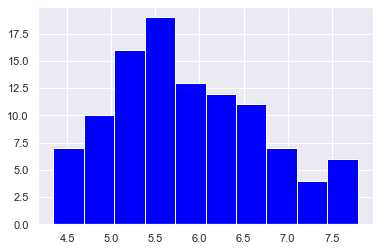

In [19]:
x1 = dataset['sepal_length']
plt.hist(x1,color = "blue")


(array([ 7., 10., 16., 19., 13., 12., 11.,  7.,  4.,  6.]),
 array([4.34400721, 4.68916258, 5.03431795, 5.37947333, 5.7246287 ,
        6.06978407, 6.41493945, 6.76009482, 7.10525019, 7.45040557,
        7.79556094]),
 <BarContainer object of 10 artists>)

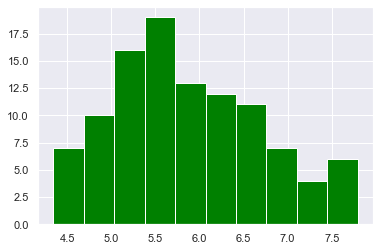

In [20]:
x2 = dataset['sepal_length']
plt.hist(x2,color = "green")


(array([28.,  4.,  0.,  1., 14., 13., 17., 12., 10.,  6.]),
 array([1.03303079, 1.60658877, 2.18014675, 2.75370473, 3.32726271,
        3.90082069, 4.47437867, 5.04793665, 5.62149463, 6.19505261,
        6.76861059]),
 <BarContainer object of 10 artists>)

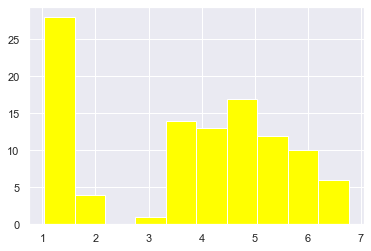

In [21]:
x3 = dataset['petal_length']
plt.hist(x3,color = "yellow")


(array([13., 21.,  1.,  3., 12., 15., 13., 11.,  8.,  8.]),
 array([-0.07220259,  0.19532992,  0.46286243,  0.73039495,  0.99792746,
         1.26545997,  1.53299248,  1.80052499,  2.0680575 ,  2.33559001,
         2.60312252]),
 <BarContainer object of 10 artists>)

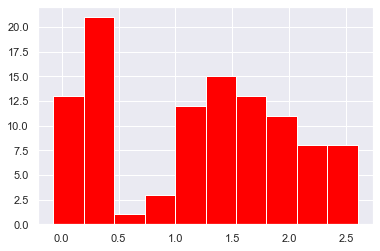

In [22]:
x4 = dataset['petal_width']
plt.hist(x4,color = "red")

In [23]:
# [CM5] For missing values I reaplaced all missing values with mean of specific features so that it can fit and give almost accurate result.
# From describe() command we can se that sepal_length and petal_width don't have any missing values. Sepal_width and petal_width features have 4 and 8 missing values in datapoints.
# Usina fillna() and mean() commands we replace missing values with mean.
dataset.fillna(dataset.mean(), inplace=True)

In [24]:
from sklearn import preprocessing

x = dataset.iloc[:, :-1].values

y = dataset.iloc[:, 4].values



In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.20, train_size=0.60,random_state = 275)

In [26]:
# ===== Basic Model =====

Text(0, 0.5, 'Mean Error')

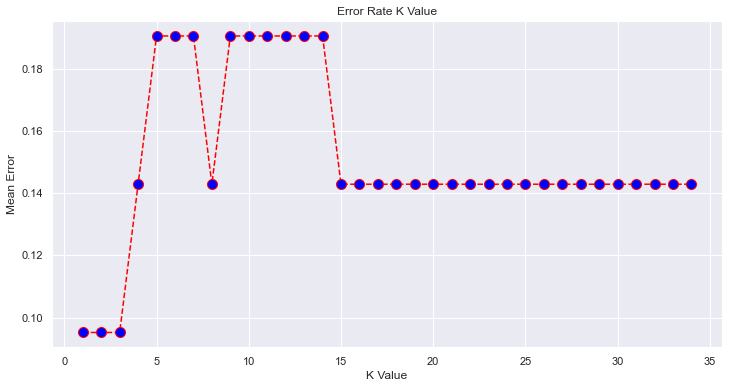

In [27]:
# In order to find best K value with respect to error rate for Sample model

from sklearn.neighbors import KNeighborsClassifier

error = []

for i in range (1,35):
    knn =  KNeighborsClassifier(n_neighbors=i, weights='distance', metric='minkowski', p=1)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
# Plotting of error and K value

plt.figure(figsize=(12,6))
plt.plot(range(1,35), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

[0.9523809523809523, 0.8571428571428571, 0.8095238095238095, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8095238095238095]


Text(0, 0.5, 'Accuracy of Sample Model')

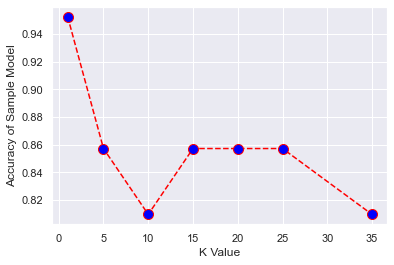

In [28]:
# [CM6] For each value of k, calculated accuracy of a Sample model. Plot a graph to analyse which value of K best fit for a Sample model.

# In order to find best K value for Sample model
from sklearn import metrics

# try K=1 through K=25 and record testing accuracy
k_range = [1,5,10,15,20,25,35]

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='minkowski', p=2)
    # p=1 manhattan_distance, p=2 eulicdean_distance  
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

plt.plot(k_range,scores, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.xlabel('K Value')
plt.ylabel('Accuracy of Sample Model')

In [29]:
# Accuracy and F-score of Sample Model ( Taking k=15 because for k=15 it shows less Error rate and more accuracy, moreover k=1 is not valid for larger dataset )

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15, weights='distance', metric='minkowski', p=2)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[3 0 0]
 [0 7 0]
 [0 3 8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         3
Iris-versicolor       0.70      1.00      0.82         7
 Iris-virginica       1.00      0.73      0.84        11

       accuracy                           0.86        21
      macro avg       0.90      0.91      0.89        21
   weighted avg       0.90      0.86      0.86        21



ROC AUC = 0.9848484848484849


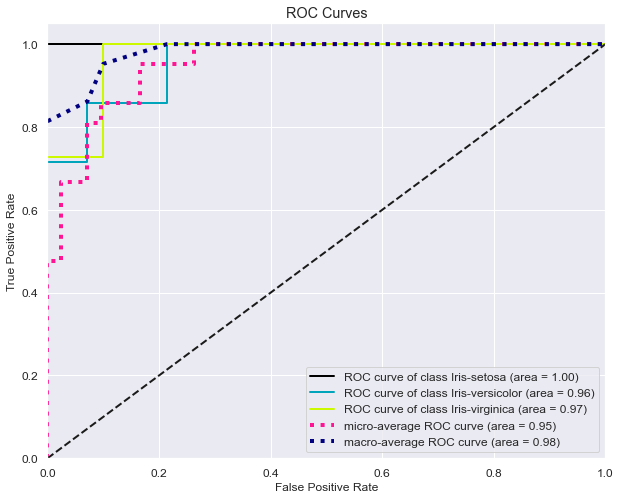

In [30]:
# AUC of Sample Model

import scikitplot as skplt
from sklearn.metrics import roc_auc_score

y_prob = knn.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,y_prob,figsize = (10,8))


#  ROC Area Under Curve (AUC)

probs = y_prob[:, 1]
print('ROC AUC =', roc_auc_score(y_test,y_prob, multi_class="ovo", average="macro"))

In [31]:
# ==================

In [32]:
# Improved Model

In [33]:
# Applying standardization instead of normalization since it provide more accuracy.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)




Text(0, 0.5, 'Mean Error')

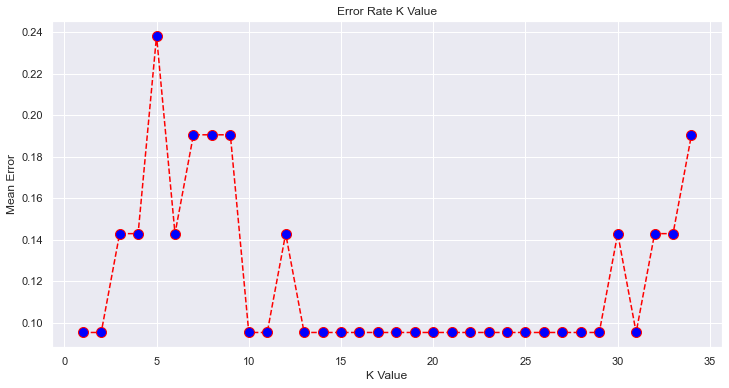

In [34]:
# In order to find best K value with respect to error rate for Improvised Model

from sklearn.neighbors import KNeighborsClassifier

error = []

for i in range (1,35):
    knn =  KNeighborsClassifier(n_neighbors=i, weights='distance', metric='minkowski', p=1)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
# Plotting of error and K value

plt.figure(figsize=(12,6))
plt.plot(range(1,35), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

[0.9047619047619048, 0.7619047619047619, 0.9047619047619048, 0.9047619047619048, 0.9047619047619048, 0.9047619047619048, 0.8571428571428571]


Text(0, 0.5, 'Accuracy of Improvised Model')

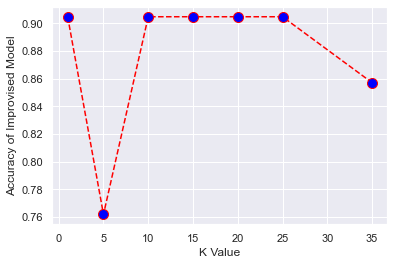

In [35]:
# [CM6] For each value of k, calculated accuracy of a Improvised model. Plot a graph to analyse which value of K best fit for a Improvised model.

# In order to find best K value for Improvised model

from sklearn import metrics

# try K=1 through K=25 and record testing accuracy
k_range = [1,5,10,15,20,25,35]

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='minkowski', p=1)
    # p=1 manhattan_distance, p=2 eulicdean_distance  
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

plt.plot(k_range,scores, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.xlabel('K Value')
plt.ylabel('Accuracy of Improvised Model')

In [36]:
# Accuracy and f-score of Improvised Model ( Taking k=15 because for k=15 it shows less Error rate and more accuracy, moreover k=1 is not valid for larger dataset )

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15, weights='distance', metric='minkowski', p=1)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[3 0 0]
 [0 7 0]
 [0 2 9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         3
Iris-versicolor       0.78      1.00      0.88         7
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.90        21
      macro avg       0.93      0.94      0.92        21
   weighted avg       0.93      0.90      0.91        21



ROC AUC = 0.989177489177489


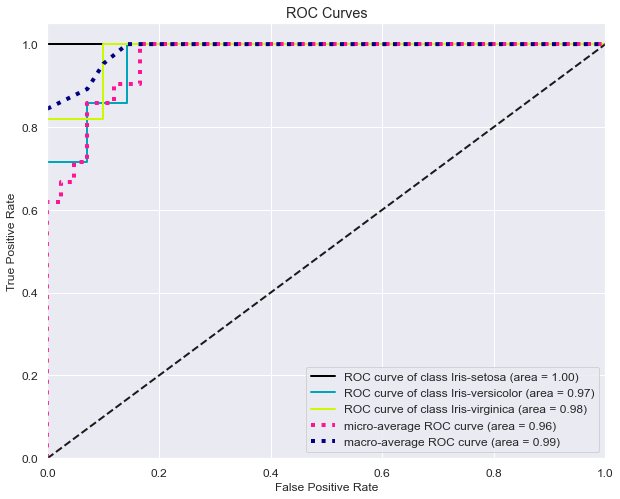

In [37]:
# AUC of Improved Model

import scikitplot as skplt
from sklearn.metrics import roc_auc_score

y_prob = knn.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,y_prob,figsize = (10,8))


#  ROC Area Under Curve (AUC)

probs = y_prob[:, 1]
print('ROC AUC =', roc_auc_score(y_test,y_prob, multi_class="ovo", average="macro"))

In [38]:
# Analysis Answers:

# [CM8](i) In order to understand characteristics of a model and minimize data discrepancies. After evaluatig model into 3 parts
#          we can test our model accuracy and behaviour by making prediction against test set. As test set already contain known
#          values for the attribute that we want to predict, it is easy to determine whether model guesses are correct or not.

# [CM8](ii) If we test K value using training and test data set, then there is a possibility of overfit the training data. Hence
#           we need to use validation set in order to tune our k value to obtain best accuracy. So after splitting our model can
#           be trained and test of different data for each K values.

# [CM8](iii) In KNN algorithm k value indicates number of nearest neighbors to include in algorithm. Accuracy of a model will  
#            not always increase when we increase K value. Sometimes when we increase value of k it is possible that variance 
#            of a model remain same (ideally it should decrease) or biase also remain same (ideally it should decrease). Hence
#            after increasing k our model have to perform more computation but accruacy may remain same.

